In [43]:
# import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV



#sns.set_theme(style="white")
%matplotlib inline

### Load the dataset

- Load the train data and using all your knowledge try to explore the different statistical properties of the dataset.

In [2]:
# Code starts here
train = pd.read_csv("train.csv")
train.head()


# Code ends here

,Id,Serial Number,total_net_assets,net_annual_expenses_ratio,morningstar_rating,portfolio_cash,portfolio_stocks,portfolio_bonds,portfolio_others,portfolio_preferred,...,category_102,category_103,category_104,category_105,category_106,category_107,investment_0,investment_1,investment_2,bonds_aaa
0,3768,8372,211000,1.90,3,0.95,99.05,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00
1,6244,5022,98930000,1.57,2,0.00,0.00,100.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.65
2,2230,3668,440000000,0.53,4,1.71,0.00,98.29,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,93.20
3,7518,8745,56050000,0.93,3,2.64,31.29,57.06,0.80,7.62,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.64
4,8037,17449,173040000,2.26,2,5.24,94.75,0.00,0.01,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00


In [3]:
train.shape

(9518, 154)

In [8]:
train.describe

<bound method NDFrame.describe of       total_net_assets  net_annual_expenses_ratio  morningstar_rating  \
0               211000                       1.90                   3   
1             98930000                       1.57                   2   
2            440000000                       0.53                   4   
3             56050000                       0.93                   3   
4            173040000                       2.26                   2   
...                ...                        ...                 ...   
9513          98070000                       1.25                   5   
9514          16380000                       0.87                   0   
9515        2610000000                       2.13                   4   
9516        5250000000                       1.12                   4   
9517         441170000                       1.27                   4   

      portfolio_cash  portfolio_stocks  portfolio_bonds  portfolio_others  \
0           

In [6]:
train = train.drop(["Id","Serial Number"], axis=1)

### Visualize the data

- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.
- Check for the correlation between the features and do some Hypothesis Testing to see if there is strong association between features.
- Clean the data, remove correlated features and apply some data preprocessing techniques

In [22]:
# Code starts here
#Critical value 
critical_value = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 11)   # Df = number of variable categories(in purpose) - 1

# Code starts here
prob = 0.95
return_rating = train["morningstar_return_rating"].value_counts()
print(f'Return Rating: {return_rating}')
risk_rating = train["morningstar_risk_rating"].value_counts()
print(f'Risk Rating: {risk_rating}')
observed = pd.concat([return_rating.transpose() ,risk_rating.transpose()] , axis=1 , keys= ['return','risk'])
print(observed)

chi2 , p, dof, ex = chi2_contingency(observed)
print(f'p-value: {p}')
print(f'Chi Statistics: {chi2}')
# Hypothesis testing
if abs(chi2) >= critical_value:
    print('Null Hypothesis is Rejected')
else:
    print('Fail to reject the Null Hypothesis')
# Code ends here.

Return Rating: 3    3138
4    2091
2    1907
0     994
5     790
1     598
Name: morningstar_return_rating, dtype: int64
Risk Rating: 3    3057
4    2098
2    1763
0     995
5     890
1     715
Name: morningstar_risk_rating, dtype: int64
   return  risk
3    3138  3057
4    2091  2098
2    1907  1763
0     994   995
5     790   890
1     598   715
p-value: 0.00032309085443671745
Chi Statistics: 23.099539737235563
Null Hypothesis is Rejected


In [23]:
# Finding correlation
correlation = abs(train.corr())

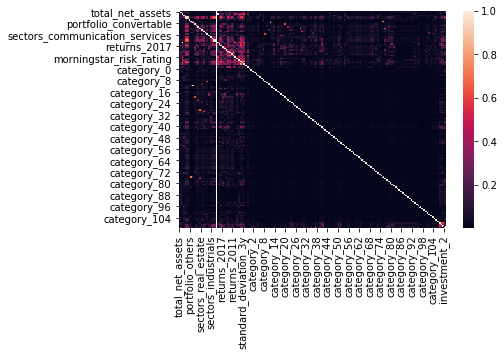

In [24]:
sns.heatmap(correlation)

In [26]:
us_correlation = correlation.unstack()
# Sorting the unstacked corelation values by descending order
us_correlation = us_correlation.sort_values(ascending = False)
# finding features having correlation > 0.75 and removing them
max_correlated = us_correlation[(us_correlation > 0.75) & (us_correlation < 1)]
print(max_correlated)

morningstar_rating         morningstar_return_rating    0.964080
morningstar_return_rating  morningstar_rating           0.964080
portfolio_stocks           portfolio_bonds              0.917010
portfolio_bonds            portfolio_stocks             0.917010
category_12                portfolio_convertable        0.899705
portfolio_convertable      category_12                  0.899705
sharpe_ratio_3y            mean_annual_return_3y        0.766910
mean_annual_return_3y      sharpe_ratio_3y              0.766910
dtype: float64


In [27]:
train.drop(['morningstar_rating','portfolio_stocks','category_12','sharpe_ratio_3y'], axis=1, inplace = True)
print(train.shape)

(9518, 148)


### Model building

- Separate the features and target.
- Now let's come to the actual task, using linear regression, predict the `bonds_aaa`. Use different techniques you have learned to imporove the performance of the model.
- Try improving upon the square root of `mean_squared_error` ([Root Mean Squared Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)) using different parameters that give the best score.


In [30]:
# Code Starts here
# independent variable 
X = train.drop(columns = 'bonds_aaa')

# target variable 
y = train.bonds_aaa
# Code ends here

In [31]:
# Splitting the data into train and validation data(70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

#### Model 1. Linear Regression 

In [46]:
# Instantiate linear model
lr = LinearRegression()

# fit the model on training data
lr.fit(X_train,y_train)

# predict on test
y_pred_lr = lr.predict(X_test)

#Calculate rmse
rmse_lr = np.sqrt(mean_squared_error(y_test,y_pred_lr))
print(f'The RMSE score for Linear Regression: {rmse_lr.round(2)}')

The RMSE score for Linear Regression: 16.05


#### Model 2. Ridge Regression 

In [34]:
# Instantiate ridge model
ridge = Ridge()

# fit the model on training data
ridge.fit(X_train,y_train)

# predict on test
y_pred_ridge = ridge.predict(X_test)

#Calculate rmse
rmse_ridge = np.sqrt(mean_squared_error(y_test,y_pred_ridge))
print(f'The RMSE score for Ridge Regression: {rmse_ridge.round(2)}')

The RMSE score for Ridge Regression: 16.06


E:\Anaconda3\envs\dl\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.35833e-24): result may not be accurate.
  overwrite_a=True).T


#### Model 2.1. Hypertuned Ridge Regression 

In [35]:
alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60]
params = dict(alpha=alphas)

In [37]:
# Instantiate ridge model
ridge_model = Ridge(random_state=42)

# Using GridSearch to find optimal parameters
grid_ridge = GridSearchCV(estimator=ridge_model, param_grid=params)
grid_ridge.fit(X_train, y_train)
print(grid_ridge.best_params_)


E:\Anaconda3\envs\dl\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.60386e-26): result may not be accurate.
  overwrite_a=True).T
E:\Anaconda3\envs\dl\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.69427e-26): result may not be accurate.
  overwrite_a=True).T
E:\Anaconda3\envs\dl\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.97784e-26): result may not be accurate.
  overwrite_a=True).T
E:\Anaconda3\envs\dl\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.5958e-26): result may not be accurate.
  overwrite_a=True).T
E:\Anaconda3\envs\dl\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.81706e-26): result may not be accurate.
  overwrite_a=True).T
E:\Anaconda3\envs\dl\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlg

E:\Anaconda3\envs\dl\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.18352e-23): result may not be accurate.
  overwrite_a=True).T
E:\Anaconda3\envs\dl\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.35827e-23): result may not be accurate.
  overwrite_a=True).T
E:\Anaconda3\envs\dl\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.14553e-23): result may not be accurate.
  overwrite_a=True).T
E:\Anaconda3\envs\dl\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.18851e-23): result may not be accurate.
  overwrite_a=True).T
E:\Anaconda3\envs\dl\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.41521e-23): result may not be accurate.
  overwrite_a=True).T
E:\Anaconda3\envs\dl\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAl

{'alpha': 1}


E:\Anaconda3\envs\dl\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.00069e-22): result may not be accurate.
  overwrite_a=True).T
E:\Anaconda3\envs\dl\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.07785e-23): result may not be accurate.
  overwrite_a=True).T
E:\Anaconda3\envs\dl\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.47559e-23): result may not be accurate.
  overwrite_a=True).T
E:\Anaconda3\envs\dl\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.35833e-24): result may not be accurate.
  overwrite_a=True).T


In [38]:
# make predictions 
y_pred_ridge_grid = grid_ridge.predict(X_test)
rmse_ridge_grid = np.sqrt(mean_squared_error(y_test,y_pred_ridge_grid))
print(f'The RMSE score for Hypertuned Ridge Regression: {rmse_ridge_grid.round(2)}')

The RMSE score for Hypertuned Ridge Regression: 16.06


#### Model 3. Lasso Regression 

In [39]:
# Instantiate Lasso model
lasso = Lasso(random_state=42)

# fit the model on training data
lasso.fit(X_train,y_train)

# predict on test
y_pred_lasso = lasso.predict(X_test)

#Calculate rmse
rmse_lasso = np.sqrt(mean_squared_error(y_test,y_pred_lasso))
print(f'The RMSE score for Lasso Regression: {rmse_lasso.round(2)}')

The RMSE score for Lasso Regression: 20.04


#### Model 3.1 Hypertuned Lasso Regression 

In [40]:
alphas_lasso = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1]
params_lasso = dict(alpha=alphas_lasso)

In [41]:
# Instantiate lasso model
lasso_model = Lasso(random_state=42)

# Using GridSearch to find optimal parameters
grid_lasso = GridSearchCV(estimator=lasso_model, param_grid=params_lasso)
grid_lasso.fit(X_train, y_train)
print(grid_lasso.best_params_)


E:\Anaconda3\envs\dl\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 658869.2804388382, tolerance: 307.51487767438925
  positive)
E:\Anaconda3\envs\dl\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 626384.9049356581, tolerance: 290.8092764488984
  positive)
E:\Anaconda3\envs\dl\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 639692.249793095, tolerance: 305.0520879554314
  positive)
E:\Anaconda3\envs\dl\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 620203.51467

{'alpha': 0.006}


In [42]:
# make predictions 
y_pred_lasso_grid = grid_lasso.predict(X_test)
rmse_lasso_grid = np.sqrt(mean_squared_error(y_test,y_pred_lasso_grid))
print(f'The RMSE score for Hypertuned lasso Regression: {rmse_lasso_grid.round(2)}')

The RMSE score for Hypertuned lasso Regression: 16.07


In [48]:
# Creating table using PrettyTable library
from prettytable import PrettyTable

names = ["Linear Regression", "Ridge Regression", "Hypertuned Ridge Regression", \
        "Lasso Regression", "Hypertuned Lasso Regression"]


rmse_score = ["%0.2f"%rmse_lr,"%0.2f"% rmse_ridge,"%0.2f"% rmse_ridge_grid,"%0.2f"% rmse_lasso,"%0.2f"% rmse_lasso_grid]

numbering = [1,2,3,4,5]

# Initializing prettytable
ptable = PrettyTable()

# Adding columns
ptable.add_column("S.NO.",numbering)
ptable.add_column("MODEL",names)
ptable.add_column("rmse-Score",rmse_score)

# Printing the Table
print(ptable)

+-------+-----------------------------+------------+
| S.NO. |            MODEL            | rmse-Score |
+-------+-----------------------------+------------+
|   1   |      Linear Regression      |   16.05    |
|   2   |       Ridge Regression      |   16.06    |
|   3   | Hypertuned Ridge Regression |   16.06    |
|   4   |       Lasso Regression      |   20.04    |
|   5   | Hypertuned Lasso Regression |   16.07    |
+-------+-----------------------------+------------+


##### Observation: From above table, we find that Linear Regression has the lowest RMSE score, hence we use the Linear Model as our final model for prediction on test data.

### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [49]:
# Code Starts here
test=pd.read_csv("test.csv")
Id=test["Id"]
test.drop(["Id","Serial Number","morningstar_rating",'portfolio_stocks','category_12','sharpe_ratio_3y'], axis = 1, inplace=True)

y_pred = lr.predict(test)
y_pred

sample_submission = pd.DataFrame({'Id':Id,'bonds_aaa':y_pred})

# Convert the sample submission file into a csv file
sample_submission.to_csv('1st_submission_lr.csv',index=False)


# Code ends here